# CS413 Image and Video Analysis -- Lab 1

## Department of Computer Science, University of Warwick
## October, 2022

## Aims:

The aims of this lab are to

+ learn about loading, displaying and saving images in Python using: `PIL` (Pillow), `numpy`  and `matplotlib` libraries
+ understand how images can be represented as arrays and performing simple manipulations on them
+ learn about what is meant by sampling and quantisation of images
+ know how to apply blurring operations to overcome aliasing artefacts
+ know about image colour channels and manipulating colour spaces
+ build a crude colour image compression by color channel subsampling

### Basic Image loading,  manipulation and visualisation

In [17]:
# import statements

from PIL import Image  # this contain the image class and methods from PIL library
import numpy as np # this imports the numerical and array library 

import matplotlib.pyplot as plt # this is for plotting (showing) images 



In [18]:
# load an image

# location of image data -- change this to wherever the lab data is kept
data_dir = 'modules/cs413/data/'

image = Image.open(data_dir+'bees.jpeg')

# print some information about the image


print('image format is ', image.format)
print('image mode is ', image.mode)
print('image size is ', image.size)

# the image size is the width x height

image format is  JPEG
image mode is  RGB
image size is  (3024, 4032)


In [19]:
# make the image into a numpy array so we can access and manipulate the pixel values
im = np.asarray(image)

print('image array type ', im.dtype)
print('image array shape ', im.shape)

# notice how the size is now expressed as number of rows x num columns x num of channels


image array type  uint8
image array shape  (4032, 3024, 3)


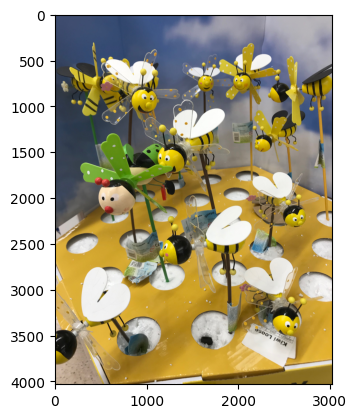

In [20]:
# now we can use pyplot.imshow to display the image

plt.imshow(im)
plt.show()

image array type  uint8
image array shape  (4032, 3024, 3)


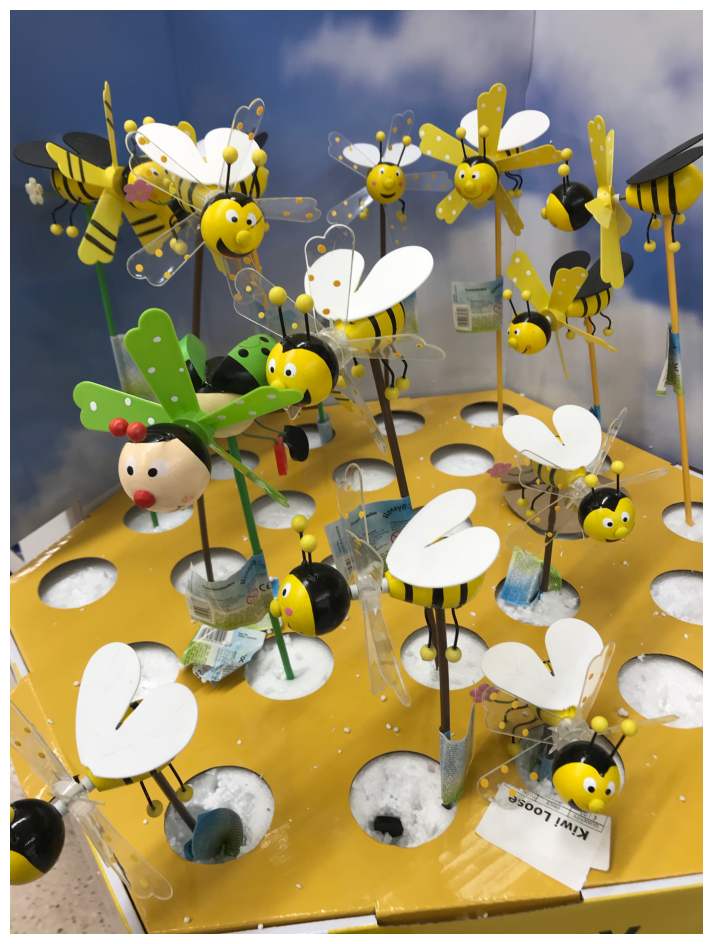

In [21]:
# if we want to make it bigger, remove the figure axis, we can do the following

fig = plt.figure(figsize=(12,12))

plt.imshow(im)
plt.axis('off')
print('image array type ', im.dtype)
print('image array shape ', im.shape)
plt.show()


### Other ways to load images into `numpy` arrays...

You can also use the `matplotlib.pyplot.imread` function

~~~
    im = plt.imread(data_dir + 'bees.jpeg')
~~~

This time, `im` is already a `numpy` array:
    
~~~~
    print(im.shape)
    (4032, 3024, 3)
~~~~
Note that that the image values are normalised on read (to range [0,1]).

Note the order of the shape sizes is given as: 
~~~~
    height (number of rows), width (number of columns), number of colour channels
~~~~

In [22]:
im = plt.imread(data_dir + 'bees.jpeg')
print(im.shape)

(4032, 3024, 3)


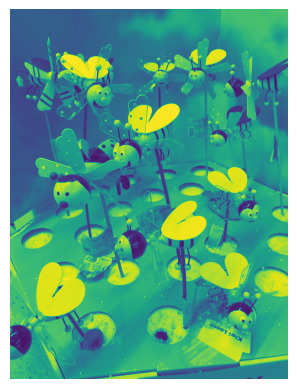

In [23]:
# Exercise 1
# 1.Display the green channel of the 'bees' image
green_pic = im[:,:,1]
plt.imshow(green_pic)
plt.axis('off')
plt.show()

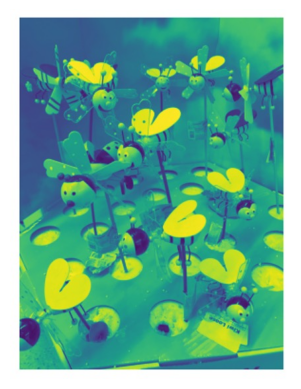

In [24]:
new_img = Image.open('green_pic.jpg')
plt.imshow(new_img)
plt.axis('off')
plt.show()

In [25]:
# Exercise 1
# 2.Create and show a binary image (which has only values 0 and 1), where the pixel value is 1 if the bees image has more that 50% green (green values > 127)
# Firstly, you should convert original picture to gray picture
Img = new_img.convert('L')

In [26]:
# Secondly, set a threshold(according to the question, over 127 should be binary 1)
# writing a loop from [0, 255], if over 127 fill 1 to the table[]
flag = 127
table = []
for i in range(256):
    if i < flag:
        table.append(0)
    else:
        table.append(1)

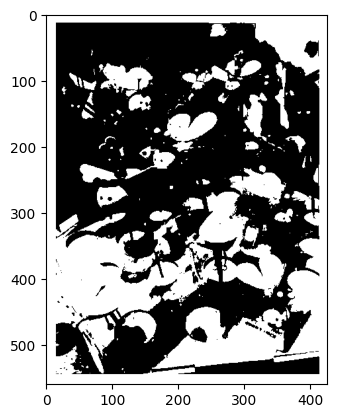

In [27]:
# show the area which number is '1'
photo = Img.point(table, '1')
plt.imshow(photo)
plt.show()

### Selecting rectangular regions of an image

This can be done using array indexing....

block has shape  (3520, 2512, 3)


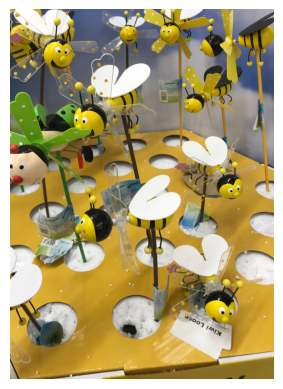

In [28]:
# We can select parts of the original image by using array range indexing

# remeber that numpy arrays can be indexed using the colon (slicing) operator to indicate a range of indexes
# e.g. a[0:10] selects the first 10 values of the array a
# for example

block = im[512:10000,512:10000] # select a region of size 256 x 256 at (512, 512)
print('block has shape ', block.shape)

plt.axis('off')
plt.imshow(block)
plt.show()

## Image representation, numpy arrays and colour:

The image is stored as 3 arrays: `im[:,:,0]`, `im[:,:,1]`, `im[:,:,2]`, where the third index 
    `(0, 1, 2)` is the colour channel (here `0=Red`, `1=Green`, `2=Blue`)
    
## Exercise 1

1. Display the green channel of the 'bees' image
2. Create and show a binary image (which has only values 0 and 1), where the pixel value is 1 if the bees image 
    has more that 50% green (green values > 127)
3. Create and show a image where the intensity represents the yellowness of a pixel in the 'bees' image. 

    a. Note that the colour yellow is when the red and green values are approximately equal, *and* blue is zero (or very small).  So you can try to write an expression for this condition. Remember the output should be a single 'yellowness' score.

    b. Another way to solve this problem is to pick a particular yellow, e.g. Y = (255, 255, 0), or Y = (128, 128, 0), and calculate an image where each output pixel value is the *distance* of its (r, g, b) value from this colour 'coordinate'. The smaller this distance, the higher the 'yellowness' score. Hint: in numpy, you can get an Euclidean distance map `np.sum(np.square(im - Y), axis=2)`, where `im` is a M x N x 3 array and `Y` is a 1 x 3 array. 


    

In [29]:
from IPython.display import display
import pandas as pd

In [30]:
# def plot_kde(channel, color):
#     """ Plots a kernel density estimate for the given data.
        
#         `channel` must be a 2d array
#         `color` must be a color string, e.g. 'r', 'g', or 'b'
#     """
#     data = channel.flatten()
#     return pd.Series(data).plot.density(c=color)

# # create the list of channels
# channels = ['r', 'g', 'b']
    
# def plot_rgb(image_data):
#     # use enumerate to loop over colors and indexes
#     for ix, color in enumerate(channels):
#         plot_kde(image_data[:, :, ix], color)

#     plt.show()
    
# plot_rgb(im)

In [31]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

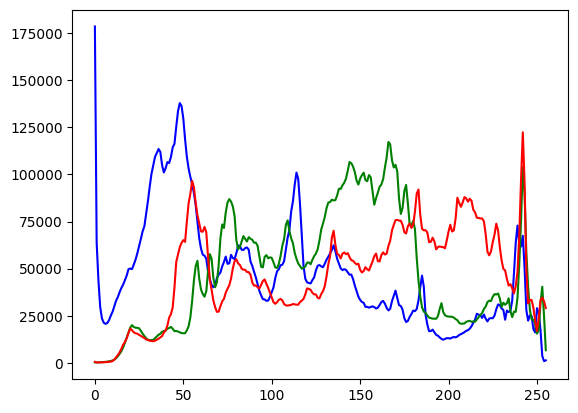

In [32]:
def image_hist(image):
    color=('blue','green','red')
    for i,color in enumerate(color):
        hist=cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(hist,color=color)
    plt.show()

if __name__ == '__main__':
    image=cv2.imread('modules/cs413/data/bees.jpeg')
    image_hist(image)

In [33]:
def calcAndDrawHist(image, color):
    hist = cv2.calcHist([image], [0], None, [256], [0.0, 255.0])
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)
    histImg = np.zeros([256, 256, 3], np.uint8)
    hpt = int(0.9*256)
 
    for h in range(256):
        intensity = int(hist[h] * hpt / maxVal)
        cv2.line(histImg, (h, 256), (h, 256-intensity), color)
 
    return histImg
 
def show_histphoto(photo_path):
    image = cv2.imread(photo_path)
    b, g, r = cv2.split(image)
 
    histImgYellow = calcAndDrawHist(b, [255, 255, 0])
 
    cv2.imshow('histImgYellow', histImgYellow)
    cv2.imshow('Img', image)
 
if __name__ == '__main__':
    photo_path = 'modules/cs413/data/bees.jpeg'
    show_histphoto(photo_path)

In [34]:
# Exercise 1
# 3.Create and show a image where the intensity represents the yellowness of a pixel in the 'bees' image.

## Exercise 2

In this exercise, I want you to select 10 random blocks of size 128 x 128 from the image. 


### Random numbers
To do this, we need to be able to generate random integers and `numpy.random.randint()` can do this,

e.g. 
~~~~
    height = im.shape[0] 
    width = im.shape[1]
    x = np.random.randint(width) # one random number in range [0, width-1]
    y = np.random.randint(height) # one random number in range [0, height-1]
~~~~

### Display multiple images in one figure

To display your 10 images togehter in one figure, you can use pyplot.suplot().

e.g.
~~~~
    # show the kth plot
    plt.subplot(2,5, k) # plot k in an array of plots 2 rows x 5 columns
    plt.imshow(block)
    plt.axis('off')
~~~~

### Loop?

Note that to solve this exercise, you need to use a for loop, e.g. something like 
~~~~
    height = im.shape[0]
    width = im.shape[1]

    block_size = 128

    for i in range(10):

        # select random position of image block

        # extract image block
        
        # display image block in subplot
        
        
    plt.show()
~~~~
   

In [35]:
from PIL import Image  # this contain the image class and methods from PIL library
import numpy as np # this imports the numerical and array library 
import matplotlib.pyplot as plt # this is for plotting (showing) images 

In [36]:
image = plt.imread('modules/cs413/data/bees.jpeg')

In [37]:
size = image.shape

In [38]:
height = size[0]
width = size[1]

In [39]:
print(height)
print(width)

4032
3024


1612
2445
(1612, 2445, 2892, 3725)
------------------
727
2277
(727, 2277, 2007, 3557)
------------------
79
1642
(79, 1642, 1359, 2922)
------------------
1122
780
(1122, 780, 2402, 2060)
------------------
60
2480
(60, 2480, 1340, 3760)
------------------
1310
1202
(1310, 1202, 2590, 2482)
------------------
428
268
(428, 268, 1708, 1548)
------------------
707
2082
(707, 2082, 1987, 3362)
------------------
607
300
(607, 300, 1887, 1580)
------------------
1272
900
(1272, 900, 2552, 2180)
------------------


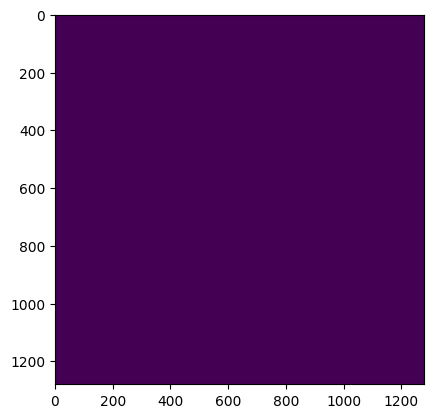

In [40]:
block_size = 1280

for i in range(10):
    x = np.random.randint(width)
    while x+block_size > width:
        x = np.random.randint(width)
    print(x)
    
    y = np.random.randint(height)
    while y+block_size > height:
        y = np.random.randint(height)
    print(y)
    
    # This is the random point coordinates that are generated
    # All of these coordinates are suitable to generate a new part of the whole picture
    box = (x, y, x+block_size, y+block_size)
    region = Img.crop(box)
    print(box)
    print('------------------')
    # region.save()
    # region.save('pic.jpg')
    
    # plt.subplot(2,5,i) 
    plt.imshow(region)
    # plt.axis('off')
    

## Subsampling and Aliasing artefacts

The numpy slicing operator can also select the step of the index range, 
e.g. `a[0:10:2]` will select the first, third, fifth, seventh and ninth element, i.e. it will select every other
element of the given range.

We can use this do image subsampling.
~~~~
    im_subx2 = im[::2,::2] # image subamplex by a factor of 2
~~~~

subsampled size is  (2016, 1512, 3)


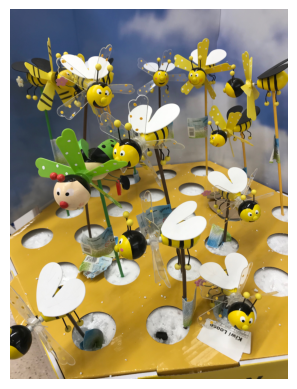

In [41]:
# subsample and display the bees image

im_subx2 = im[::2,::2]

print('subsampled size is ', im_subx2.shape)

plt.axis('off')
plt.imshow(im_subx2)
plt.show()

In [42]:
from PIL import Image  # this contain the image class and methods from PIL library
import numpy as np # this imports the numerical and array library 
import matplotlib.pyplot as plt # this is for plotting (showing) images 

In [43]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [44]:
fm = np.asarray(Image.open('jupyter/modules/cs413/data/testimage512.gif'))
print(fm.shape, fm.dtype)
fig = plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(fm, )



FileNotFoundError: [Errno 2] No such file or directory: 'jupyter/modules/cs413/data/testimage512.gif'

## Exercise 3 -- Downsampling and upsampling

It is not easy to see what the subsampling is doing to the bees image content (other than reducing the resolution).
Instead, we can use a FM test pattern image (`testimage512.gif`) to visualise the artefacts created in the
spatial frequencies.

1. Load the and display the image `testimage512.gif` which is in the data directory.

~~~~
    fm = np.asarray(Image.open(data_dir + 'testimage512.gif'))

    print(fm.shape, fm.dtype)
    fig = plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(fm, interpolation='sinc', cmap='gray') # use 'sinc' interpolation in imshow 
    plt.show()
~~~~

(Note we have to use a better display interpolation for the `imshow()` to avoid seeing display artefacts!)

2. Use `plt.subplot()` to display side-by-side the testimage at resolutions which are reduced by factors 2, 4, and 8.

3. Work out how to upsample the image by pixel duplication. Write a function to upsample an image, e.g.:

~~~~
    def upsample(im, size=2):
    
        # define an array of zeros of twice the size of the input im
        output = np.zeros(...)
        
        # do a nested for loop to broad cast values from input to output
        
        for i in ... : # step in size
            for j in ... : # step in size
                
                output[i:i+size,j:j+size] = im[i//size,j//size] # broad cast values
                
        return output
~~~~
                
3. Use your function to upsample the downsampled image and display the results.


## Antialiasing using blurring

Aliasing is caused by not having a sufficient sampling rate for the frequencies present in the signal. 

To reduce the effects of aliasing when subsampling, we can attenuate (reduce) the high-frequencies above the Nyquist
rate (twice the sampling rate) by blurring (low-pass filtering).

The simplest form of low-pass filtering is blurring by local averaging.


In [ ]:
# blurring by local averaging 

def local_average(im, size=3):

    half_size = size//2
    
    # make an empty output array
    output = np.zeros(im.shape, dtype='float') # an array the same size of zeros

    # use a nested for loop to sweep over rows and columns 
    for i in range(half_size,im.shape[0]-half_size):
        for j in range(half_size,im.shape[1]-half_size):
            
            # extract a square region around the current pixel 
            block = im[i-half_size:i+half_size,j-half_size:j+half_size]

            # put the average value in the current output pixel
            output[i,j] = np.mean(block)
            
    return output


            

## Exercise 4 -- Antialiasing

This exercise you will use blurring prior to sub-sampling to antialias the image:
    
1. Use the function `local_average` to blur the FM test pattern image and show its effect for averaging 
    regions of different sizes, (e.g. 3, 5, 7)
    
2. Write a new function called `antialias_subsample` which where you take an input image, blur it and then sub-sample.

3. Use your new function to show the compare a subsampled FM test pattern with and without the antialiasing blur.



## Quantisation by bit-shift operations

We can quantise the image range (for images this is usually 0..255) and visualise what happens if we quantise 
    the range to fewer levels, e.g. (128=7 bits, 64=6 bits, 32=5 bits, 16=4 bits, etc.).
    

In `numpy`, bytes can be represented by variable of data type `uint8` (unsigned integer, 8 bits), e.g.
~~~~
    a = np.uint8(10) # byte with value 10
~~~~

We can then left-shift or right-shift this value which multiples or divides by a factor of 2, e.g.
~~~~
    print(a<<1) # should print 20
    
    print(a>>1) # should print 5
~~~~

In Python we can print out the binary representation like this

~~~~
    print("{0:b}".format(a))
~~~~
To quantise a number to say 4 bits, we therefore need to right-shift by 4, e.g. 

~~~~
    a = np.uint8(57) # binary is [00111001]
    
    print("a is {0:b}".format(b)) 
    print("a right-shift 4 is {0:b}".format(a>>4)) 
~~~~

We can then re-express the number in 8-bits by left-shifting the quantised value.
~~~~
        print("a quanited (in 0-255) range is {0:b}".format((a>>4)<<4))) 
        
~~~~
Therefore with an image of type `uint8`, we can quantise it by right-shifting all the pixel values and then left-shifting them.


In [ ]:

a = np.uint8(57) # make it 8 bits

print("a is {0:b}".format(a)) 

print("a right-shift 4 is {0:b}".format(a>>4)) # right-shift (quantise)
print("a right-shift then left-shift 4 is {0:b}".format((a>>4)<<4)) # left-shift to see what it does

# print out the decimal values
print("a in 8 bits is ", a, ', quantised it becomes ', ((a>>4)<<4))

## Exercise 5 -- Image quantisation

1. Using the bit shifting method, write a function to quantize an input image to an arbirary number of bits between 1 and 8.

~~~~
    def quantise_image(im, bits=8):
    
        quantised = ...   # quantise to bits number of bits
        
        output = ... # remap to range 0..255 by reversing quantisation
        
        return output
~~~~

2. Show the effect of quantisation on the `peppers.jpg` image.

3. Make a scalar image of the quantisation errors or 4-bit quantisation. 
    1. Where are the quantisation errors in the image?
    2. Where are the quantisation errors most visible?


## Colour conversion and Colour channel data compression

We can convert image pixels from a RGB colour space to a luminance-chromanance colour space, 
    e.g. YCbCr using utility functions defined.
    
Here are two functions which do this operation.

~~~~
    def rgb2ycbcr(im):
        xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
        
        ycbcr = im.dot(xform.T)
        ycbcr[:,:,[1,2]] += 128
        
        return np.uint8(ycbcr)

    def ycbcr2rgb(im):
        xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
        
        rgb = im.astype(np.float)
        
        rgb[:,:,[1,2]] -= 128
        rgb = rgb.dot(xform.T)
        
        np.putmask(rgb, rgb > 255, 255)
        np.putmask(rgb, rgb < 0, 0)
        
        return np.uint8(rgb)
~~~~

Can you work out what they are doing?

## Exercise 6 -- Colour conversion and colour channel 'compression'

1. Define the two methods and use them to display the Y, Cb and Cr channels of the `peppers.jpg` image as gray-scale images.

2. Use the `local_average` method to blur the Cb and Cr channels (either or both) and then convert them 
    back to a RGB image. Compare the the original image and the blurred Cb/Cr channel images. 
    
3. Repeat the previous exercise but this time subsample and upsample the Cb/Cr images instead of blurring them.

4. How much blurring/subsampling/upsampling can you do before you it starts to affect the reconstituted RGB image?

5. By reducing the sizes of the Cb/Cr images by subsampling, we are in effect compressing the data. 
   
   What is the compression factor if you subsample by some power-of-two factor $ F = 2^M $, where $ M = 1, 2, 3, ... $?